# Kernel Principal Component Analysis

## ======= Import the dataset ========

In [1]:
import pandas as pd
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values #make sure the shape is (a,), not (a, b)

# ====== Splitting the dataset into the Training set and Test set ====

In [2]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# ======= Feature Scaling ========

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## ======= Applying Kernel PCA =======

In [4]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel = 'rbf') #set None to observe the variance, then set to 2 because we want to plot in 2d
x_train = kpca.fit_transform(x_train) #unsupervised learning
x_test = kpca.transform(x_test)

## ====== Fitting the logistic regression model to the training set ===

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## ======= Predict the training and test sets results ======

In [6]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

## ======== Making the confusion matrix =====

In [7]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train, labels=[0, 1])
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1]) #lables indicate the order of the results
print ('The accuracy for the training set is %f.\n'%((cm_train[0][0]+cm_train[1][1])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%((cm_test[0][0]+cm_test[1][1])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.890000.

The accuracy for the test set is 0.900000.



## ======= Visualising the Training set results ========

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


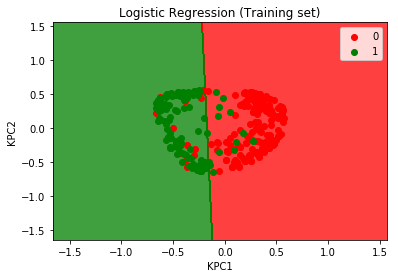

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()

## ======= Visualising the Test set results ========

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


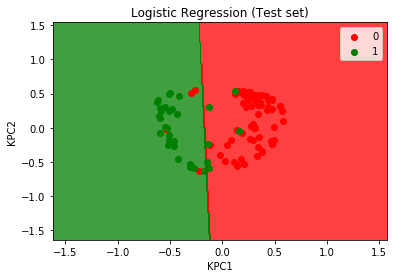

In [9]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()